In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [3]:
nf = pd.read_csv('/content/drive/MyDrive/nifty/Nifty50_2016to2023 .csv')

In [4]:
nf.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,10-Feb-2016,7264.30,7271.85,7177.75,7215.70,254481339,8129.65
1,11-Feb-2016,7203.60,7208.65,6959.95,6976.35,301302956,9250.27
2,12-Feb-2016,7023.65,7034.80,6869.00,6980.95,344210729,11062.63
3,15-Feb-2016,7057.35,7182.80,7056.80,7162.95,365217073,10204.34
4,16-Feb-2016,7201.25,7204.65,7037.70,7048.25,261607451,7638.39


In [5]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
nf['MA10'] =nf['Close'].rolling(10).mean()
nf['MA50'] =nf['Close'].rolling(50).mean()
nf=nf.dropna()
nf.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),MA10,MA50
49,27-Apr-2016,7942.00,7991.00,7940.55,7979.90,213174058,9669.04,7866.920,7494.150
50,28-Apr-2016,7967.40,7992.00,7834.45,7847.25,301485186,14943.30,7884.505,7506.781
51,29-Apr-2016,7844.25,7889.05,7788.70,7849.80,251227047,9872.58,7898.590,7524.250
52,02-May-2016,7822.70,7829.80,7777.30,7805.90,150818181,6079.16,7894.135,7540.749
53,03-May-2016,7824.80,7890.25,7735.15,7747.00,192271370,8536.83,7877.365,7552.430


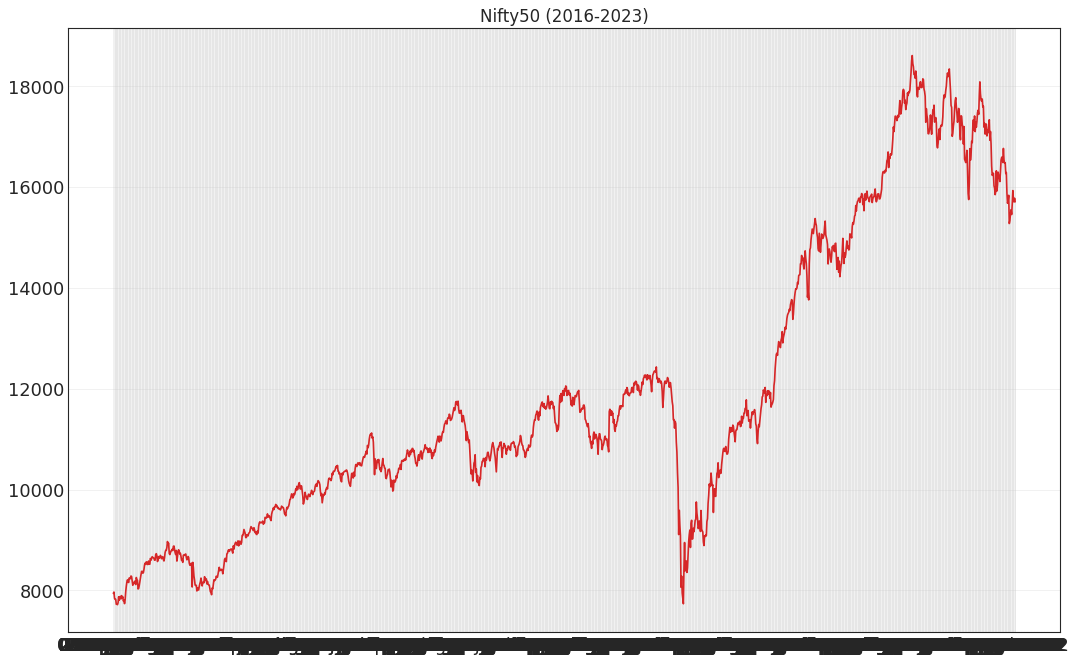

In [31]:
#Nifty50(2019-2023) plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Date', 'Open', data=nf, color='tab:red')

plt.title("Nifty50 (2016-2023)", fontsize=15)
plt.grid(axis='both', alpha=.3)

plt.show()

In [7]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
nf['Shares'] = [1 if nf.loc[ei, 'MA10']>nf.loc[ei, 'MA50'] else 0 for ei in nf.index]

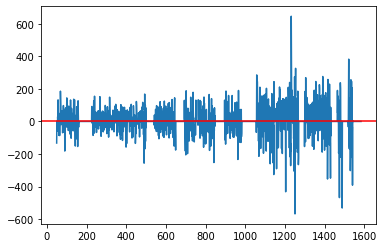

In [8]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
nf['Close1'] = nf['Close'].shift(-1)
nf['Profit'] = [nf.loc[ei, 'Close1'] - nf.loc[ei, 'Close'] if nf.loc[ei, 'Shares']==1 else 0 for ei in nf.index]
nf['Profit'].plot()
plt.axhline(y=0, color='red')

In [9]:
#Use .cumsum() to calculate the accumulated wealth over the period
nf["wealth"] =nf['Profit'].cumsum()
nf.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),MA10,MA50,Shares,Close1,Profit,wealth
1580,27-Jun-2022,15926.20,15927.45,15815.50,15832.05,210932505,17770.42,15556.855,16323.312,0,15850.20,0.0,8239.7
1581,28-Jun-2022,15757.45,15892.10,15710.15,15850.20,251865155,18419.75,15568.665,16296.843,0,15799.10,0.0,8239.7
1582,29-Jun-2022,15701.70,15861.60,15687.80,15799.10,444949551,22528.57,15579.360,16273.652,0,15780.25,0.0,8239.7
1583,30-Jun-2022,15774.50,15890.00,15728.85,15780.25,306027777,23970.65,15621.325,16246.526,0,15752.05,0.0,8239.7
1584,01-Jul-2022,15703.70,15793.95,15511.05,15752.05,364090131,25891.94,15667.180,16213.715,0,NaN,0.0,8239.7


Text(0.5, 1.0, 'Total money you win is 8239.699999999997')

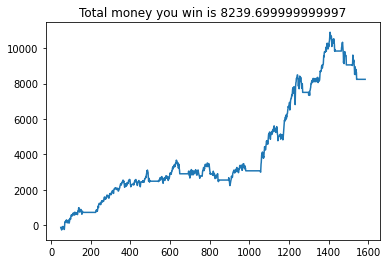

In [10]:
#plot the wealth to show the growth of profit over the period
nf['wealth'].plot()
plt.title("Total money you win is {}".format(nf.loc[nf.index[-2],'wealth']))